In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SDG_goal3_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 28 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Country                                                                                                                          163 non-null    object 
 1   Year                                                                                                                             163 non-null    int64  
 2   Region                                                                                                                           163 non-null    object 
 3   Maternal mortality ratio                                                                            

In [4]:
df.head()

,Country,Year,Region,Maternal mortality ratio,Proportion of births attended by skilled health personnel (%),"Infant mortality rate (deaths per 1,000 live births):::BOTHSEX","Infant mortality rate (deaths per 1,000 live births):::MALE","Infant mortality rate (deaths per 1,000 live births):::FEMALE","Under-five mortality rate, by sex (deaths per 1,000 live births):::BOTHSEX","Under-five mortality rate, by sex (deaths per 1,000 live births):::MALE",...,"Suicide mortality rate, by sex (deaths per 100,000 population):::MALE","Suicide mortality rate, by sex (deaths per 100,000 population):::FEMALE","Death rate due to road traffic injuries, by sex (per 100,000 population):::BOTHSEX","Death rate due to road traffic injuries, by sex (per 100,000 population):::MALE","Death rate due to road traffic injuries, by sex (per 100,000 population):::FEMALE","Adolescent birth rate (per 1,000 women aged 15-19 years)",Universal health coverage (UHC) service coverage index,"Health worker density, by type of occupation (per 10,000 population)::PHYSICIAN","Health worker density, by type of occupation (per 10,000 population)::NURSEMIDWIFE","Health worker density, by type of occupation (per 10,000 population)::PHARMACIST"
0,Albania,2000,Europe,23,99.1,24.1,27.4,20.6,27.2,30.1,...,7.0,2.8,14.3,22.4,6.1,17.2,44,13.821,40.170,3.432
1,Armenia,2000,Asia,43,96.8,27.0,29.8,24.1,30.7,33.8,...,5.1,1.9,19.6,32.2,8.6,31.6,44,27.007,59.089,0.345
2,Armenia,2005,Asia,35,97.8,21.3,23.5,18.8,23.9,26.4,...,6.6,2.1,18.3,28.6,9.2,25.9,45,25.643,49.884,0.319
3,Armenia,2010,Asia,32,99.5,16.5,18.3,14.6,18.5,20.5,...,10.5,3.5,18.0,27.7,9.5,27.1,57,28.419,52.396,0.427
4,Australia,2000,Oceania,7,99.3,5.1,5.6,4.6,6.2,6.8,...,19.9,5.6,9.9,14.0,5.7,17.8,79,24.944,100.871,8.056


# The Overall aggregate

In [5]:
# Overall median, min and max values of selected attributes
df_overall = df[['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX','Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE','Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE','Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease','Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease','Universal health coverage (UHC) service coverage index']].copy()

df_overall_median = df_overall.agg('median').reset_index(name='median')
df_overall_min = df_overall.agg('min').reset_index(name='minimum')
df_overall_max = df_overall.agg('max').reset_index(name='maximum')

df_overall_aggregete = df_overall_median.merge(df_overall_min, on = 'index', how = 'outer').merge(df_overall_max, on = 'index', how = 'outer')

df_overall_aggregete = pd.pivot_table(df_overall_aggregete, values = ['median','minimum','maximum'], columns = 'index').reset_index()

# Rename columns of df_overall_aggregete
df_overall_aggregete = df_overall_aggregete.rename(columns = {'index':'Aggregation'})

df_overall_aggregete

index,Aggregation,"Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease","Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease","Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX","Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE","Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE",Universal health coverage (UHC) service coverage index
0,maximum,0.474,0.327,53.0,45.7,60.5,86.0
1,median,0.305,0.036,18.8,14.0,24.6,68.0
2,minimum,0.102,0.005,8.4,5.1,10.5,25.0


# 2000 -2015 Mortality attributable to cardiovascular disease, cancer, diabetes or chronic respiratory disease in different regions (probability):::BOTHSEX

In [6]:
# median mortality rate group by region and year

median_region = df.groupby(['Region','Year'])['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'].agg('median').reset_index(name='Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX')

median_region

,Region,Year,"Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX"
0,Africa,2005,25.05
1,Africa,2010,22.80
2,Africa,2015,22.50
3,Americas,2000,14.30
4,Americas,2005,16.70
5,Americas,2010,12.90
6,Americas,2015,11.60
7,Asia,2000,30.40
8,Asia,2005,25.70
9,Asia,2010,26.05


Above is grouping to find the median value：median mortality rate attributed to CCDC, group by region and year

In [7]:
median_overall_world = df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'].agg('median')

median_overall_world

18.8

Above is grouping to find the median value：median mortality rate attributed to CCDC

In [8]:
# Get a region list and convert it into a data frame
df_region = df['Region'].drop_duplicates().to_frame()

# Get a year list and convert it into a data frame
df_year = df['Year'].drop_duplicates().to_frame()


# Created a data frame containing all regions and corresponding to all years
df_region['key'] = 0
df_year['key'] = 0
df_full = df_region.merge(df_year, on = 'key', how = 'outer')

df_full

,Region,key,Year
0,Europe,0,2000
1,Europe,0,2005
2,Europe,0,2010
3,Europe,0,2015
4,Asia,0,2000
5,Asia,0,2005
6,Asia,0,2010
7,Asia,0,2015
8,Oceania,0,2000
9,Oceania,0,2005


In [9]:
# group median Female mortality rate by region,then join with data frame df_full
median_region = median_region.merge(df_full, on = ['Region', 'Year'], how = 'right').drop(columns='key')

median_region

,Region,Year,"Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX"
0,Europe,2000,22.50
1,Europe,2005,19.70
2,Europe,2010,18.30
3,Europe,2015,11.90
4,Asia,2000,30.40
5,Asia,2005,25.70
6,Asia,2010,26.05
7,Asia,2015,16.80
8,Oceania,2000,14.40
9,Oceania,2005,12.35


In [10]:
year1, year2, year3, year4 = [], [], [], []
for index, row in median_region.iterrows():
    match row['Year']:
        case 2000:
            year1.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'])
        case 2005:
            year2.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'])
        case 2010:
            year3.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'])
        case 2015:
            year4.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'])

In [11]:
labels = df['Region'].drop_duplicates().tolist()

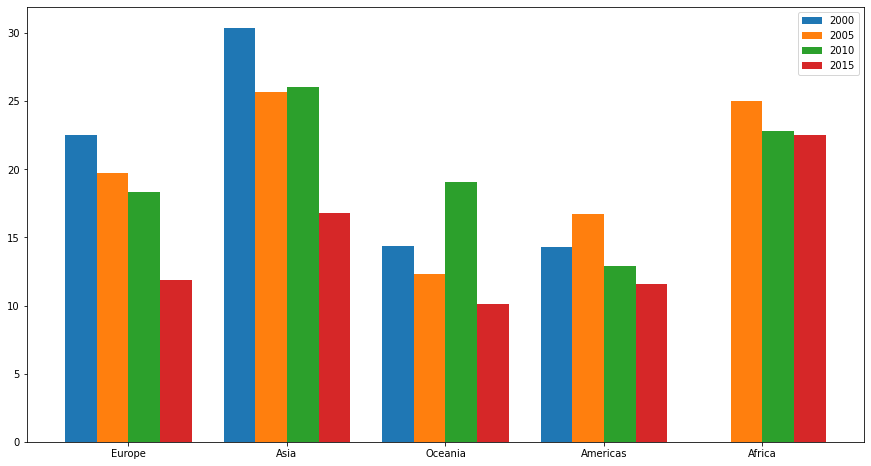

In [12]:
x = np.arange(len(labels))
total_width = 0.8
n = 4
width = total_width / n

fig = plt.figure(figsize = (15, 8))
plt.bar(x - 1.5 * width, year1, width=width, label='2000')
plt.bar(x - 0.5 * width, year2, width=width, label='2005')
plt.bar(x + 0.5 * width, year3, width=width, label='2010')
plt.bar(x + 1.5 * width, year4, width=width, label='2015')
plt.xticks(x, labels = labels)
plt.legend()
plt.show()

# Line chart：fraction of death due to diabetes among CCDC in different regions

In [13]:
# median Fraction of deaths due to diabetes(overall)
overall_median_fraction_diabetes = df['Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].agg('median')

overall_median_fraction_diabetes

0.036

Above is：overall median fraction of deaths due to diabetes

Below is median fraction of deaths due to diabetes group by region and year

In [14]:
# median Fraction of deaths due to diabetes group by region and year

median_region_fraction_diabetes = df.groupby(['Region','Year'])['Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].agg('median').reset_index(name='Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease')

# median_region_fraction_diabetes join with data frame df_full
median_region_fraction_diabetes = median_region_fraction_diabetes.merge(df_full, on = ['Region', 'Year'], how = 'right').drop(columns='key')

median_region_fraction_diabetes

,Region,Year,"Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease"
0,Europe,2000,0.0180
1,Europe,2005,0.0230
2,Europe,2010,0.0230
3,Europe,2015,0.0280
4,Asia,2000,0.0385
5,Asia,2005,0.0480
6,Asia,2010,0.0455
7,Asia,2015,0.0730
8,Oceania,2000,0.0345
9,Oceania,2005,0.0380


In [15]:
x = median_region_fraction_diabetes['Year'].drop_duplicates().tolist()

y_europe = median_region_fraction_diabetes.loc[median_region_fraction_diabetes['Region']=='Europe']['Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].tolist()

y_asia = median_region_fraction_diabetes.loc[median_region_fraction_diabetes['Region']=='Asia']['Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].tolist()

y_oceania = median_region_fraction_diabetes.loc[median_region_fraction_diabetes['Region']=='Oceania']['Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].tolist()

y_americas = median_region_fraction_diabetes.loc[median_region_fraction_diabetes['Region']=='Americas']['Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].tolist()

y_africa = median_region_fraction_diabetes.loc[median_region_fraction_diabetes['Region']=='Africa']['Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].tolist()


In [16]:
median_region_fraction_diabetes = median_region_fraction_diabetes.pivot(index='Year', columns='Region',values='Median of Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease').reset_index()

median_region_fraction_diabetes

Region,Year,Africa,Americas,Asia,Europe,Oceania
0,2000,NaN,0.077,0.0385,0.018,0.0345
1,2005,0.0975,0.151,0.0480,0.023,0.0380
2,2010,0.0900,0.061,0.0455,0.023,0.1250
3,2015,0.2050,0.125,0.0730,0.028,0.0405


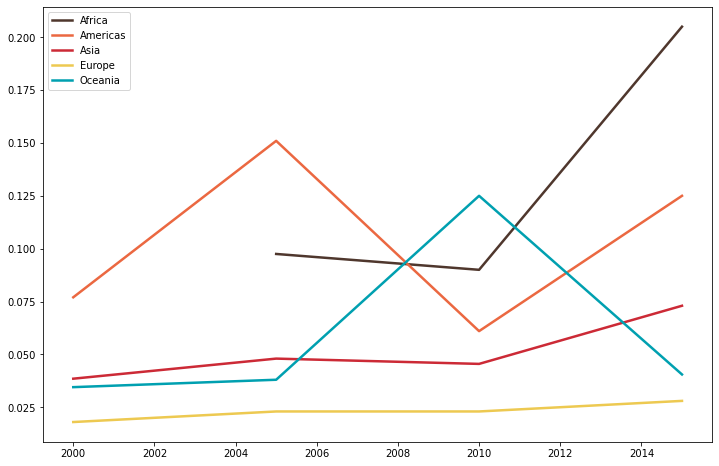

In [17]:
fig = plt.figure(figsize = (12, 8))

plt.plot('Year','Africa',data=median_region_fraction_diabetes, color='#4f372d', linewidth=2.5, label='Africa')
plt.plot('Year','Americas',data=median_region_fraction_diabetes, color='#eb6841', linewidth=2.5, label='Americas')
plt.plot('Year','Asia',data=median_region_fraction_diabetes, color='#cc2a36', linewidth=2.5, label='Asia')
plt.plot('Year','Europe',data=median_region_fraction_diabetes, color='#edc951', linewidth=2.5, label='Europe')
plt.plot('Year','Oceania',data=median_region_fraction_diabetes, color='#00a0b0', linewidth=2.5, label='Oceania')

plt.legend(loc='upper left')

plt.show()

## Line chart：fraction of death due to cancer among CCDC in different regions

In [18]:
# median Fraction of deaths due to cancer（overall）

overall_median_fraction_cancer = df['Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].agg('median')

overall_median_fraction_cancer

0.305

Above is： overall 的 median fraction of deaths due to cancer

Below is： median fraction of deaths due to cancer group by region and year

In [19]:
# median Fraction of deaths due to cancer group by region and year

median_region_fraction_cancer = df.groupby(['Region','Year'])['Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'].agg('median').reset_index(name='Median of Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease')

# median_region_fraction_cancer join with data frame df_full
median_region_fraction_cancer = median_region_fraction_cancer.merge(df_full, on = ['Region', 'Year'], how = 'right').drop(columns='key')

median_region_fraction_cancer

,Region,Year,"Median of Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease"
0,Europe,2000,0.2970
1,Europe,2005,0.3230
2,Europe,2010,0.3245
3,Europe,2015,0.3490
4,Asia,2000,0.1845
5,Asia,2005,0.2000
6,Asia,2010,0.2240
7,Asia,2015,0.3100
8,Oceania,2000,0.3685
9,Oceania,2005,0.3845


In [20]:
median_region_fraction_cancer = median_region_fraction_cancer.pivot(index='Year', columns='Region',values='Median of Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease').reset_index()

median_region_fraction_cancer

Region,Year,Africa,Americas,Asia,Europe,Oceania
0,2000,NaN,0.300,0.1845,0.2970,0.3685
1,2005,0.2525,0.329,0.2000,0.3230,0.3845
2,2010,0.2445,0.386,0.2240,0.3245,0.3415
3,2015,0.1785,0.350,0.3100,0.3490,0.4205


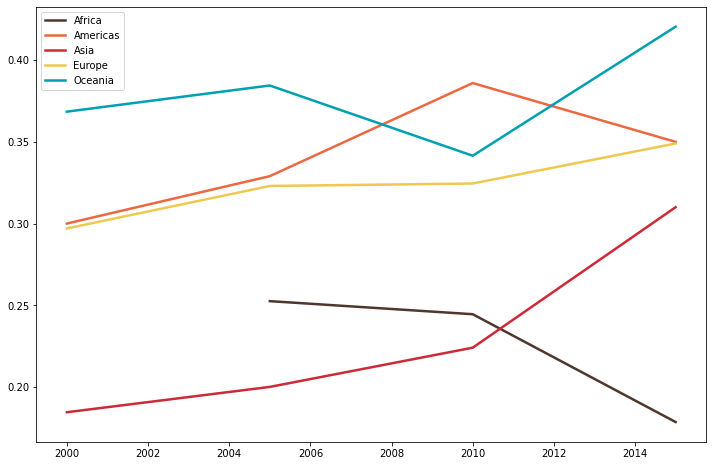

In [21]:
fig = plt.figure(figsize = (12, 8))

plt.plot('Year','Africa',data=median_region_fraction_cancer, color='#4f372d', linewidth=2.5, label='Africa')
plt.plot('Year','Americas',data=median_region_fraction_cancer, color='#eb6841', linewidth=2.5, label='Americas')
plt.plot('Year','Asia',data=median_region_fraction_cancer, color='#cc2a36', linewidth=2.5, label='Asia')
plt.plot('Year','Europe',data=median_region_fraction_cancer, color='#edc951', linewidth=2.5, label='Europe')
plt.plot('Year','Oceania',data=median_region_fraction_cancer, color='#00a0b0', linewidth=2.5, label='Oceania')

plt.legend(loc='upper left')
plt.show()

# Mortality attributable to cardiovascular disease, cancer, diabetes, or chronic respiratory disease for men and women (probability)

In [22]:
# Overall by gender, mortality (probability) attributable to cardiovascular disease, cancer, diabetes, or chronic respiratory disease
df_male = df[['Country', 'Year', 'Region', 'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE']].copy()
df_female = df[['Country', 'Year', 'Region', 'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE']].copy()
df_male['Gender'] = 'Male'
df_female['Gender'] = 'Female'
df_male.rename(columns = {'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE':'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)'}, inplace = True)
df_female.rename(columns = {'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE':'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)'}, inplace = True)
df_gender = pd.concat([df_male, df_female])
df_gender_median = df_gender.groupby('Gender')['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)'].agg('median').reset_index(name='Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)')
df_gender_median

,Gender,"Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)"
0,Female,14.0
1,Male,24.6


In [23]:
# Get a region list and convert it into a data frame
df_region = df['Region'].drop_duplicates().to_frame()

# Get a year list and convert it into a data frame
df_year = df['Year'].drop_duplicates().to_frame()

# Created a data frame containing all regions and corresponding to all years
df_region['key'] = 0
df_year['key'] = 0
df_full = df_region.merge(df_year, on = 'key', how = 'outer')

In [24]:
# median Male mortality rate group by region and year, attributed to CCDC

median_region_male = df.groupby(['Region','Year'])['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE'].agg('median').reset_index(name='Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE')

# Grouped median Male mortality rate by region，then join with dataframe df_full
median_region_male = median_region_male.merge(df_full, on = ['Region', 'Year'], how = 'right').drop(columns='key' )

In [25]:
# median Female mortality rate group by region and year, attributed to CCDC

median_region_female = df.groupby(['Region','Year'])['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE'].agg('median').reset_index(name='Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE')

# Grouped median Female mortality rate by region，then join with dataframe df_full
median_region_female = median_region_female.merge(df_full, on = ['Region', 'Year'], how = 'right').drop(columns='key')

In [26]:
# prepare table for Median Mortality rate attributed to cardiovascular disease, cancer, diabetes, or chronic respiratory disease (probability) for different gender in different region between 2000 and 2015.

table_median_region_male = median_region_male.copy()
table_median_region_male['Gender']='Male'

# Rename columns of table_median_region_male
table_median_region_male.columns = ['Region', 'Year', 'Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)', 'Gender']

table_median_region_female = median_region_female.copy()
table_median_region_female['Gender']='Female'
# Rename columns of table_median_region_female
table_median_region_female.columns = ['Region', 'Year', 'Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)', 'Gender']

# concatenate two dataframes into one
frames = [table_median_region_male, table_median_region_female]
table_median_region = pd.concat(frames)
table_median_region.sort_values(by=['Region','Year']).reset_index(drop = True)

,Region,Year,"Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)",Gender
0,Africa,2000,NaN,Male
1,Africa,2000,NaN,Female
2,Africa,2005,30.50,Male
3,Africa,2005,19.50,Female
4,Africa,2010,25.85,Male
5,Africa,2010,17.05,Female
6,Africa,2015,25.20,Male
7,Africa,2015,19.85,Female
8,Americas,2000,16.40,Male
9,Americas,2000,12.40,Female


In [27]:
# Prepare the data for female
year1_female, year2_female, year3_female, year4_female = [], [], [], []
for index, row in median_region_female.iterrows():
    match row['Year']:
        case 2000:
            year1_female.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE'])
        case 2005:
            year2_female.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE'])
        case 2010:
            year3_female.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE'])
        case 2015:
            year4_female.append(row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE'])
            
# Prepare the data for male
year1_male, year2_male, year3_male, year4_male = [], [], [], []
for index, row in median_region_male.iterrows():
    match row['Year']:
        case 2000:
            year1_male.append(-row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE'])
        case 2005:
            year2_male.append(-row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE'])
        case 2010:
            year3_male.append(-row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE'])
        case 2015:
            year4_male.append(-row['Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE'])

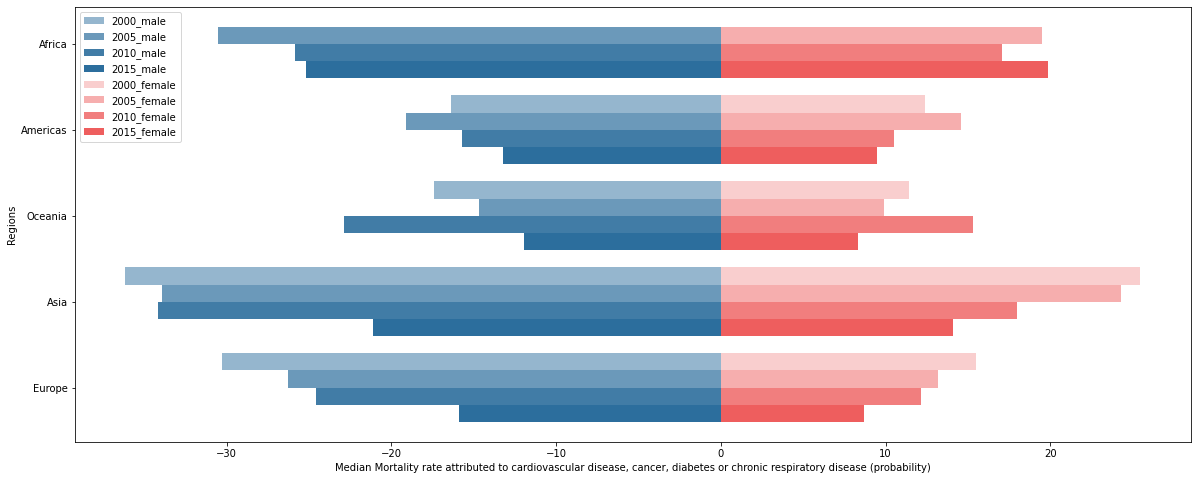

In [28]:
# draw butterfly chart and set parameters
labels = df['Region'].drop_duplicates().tolist()
y = np.arange(len(labels))
total_width = 0.8
n = 4
width = total_width / n

fig = plt.figure(figsize = (20, 8))
plt.barh(y + 1.5 * width, year1_male, height=width, color='#95b6ce', label='2000_male')
plt.barh(y + 0.5 * width, year2_male, height=width, color='#6b99ba', label='2005_male')
plt.barh(y - 0.5 * width, year3_male, height=width, color='#417ca6', label='2010_male')
plt.barh(y - 1.5 * width, year4_male, height=width, color='#2c6e9d', label='2015_male')

plt.barh(y + 1.5 * width, year1_female, height=width, color='#f9cece', label='2000_female')
plt.barh(y + 0.5 * width, year2_female, height=width, color='#f6aeae', label='2005_female')
plt.barh(y - 0.5 * width, year3_female, height=width, color='#f17e7e', label='2010_female')
plt.barh(y - 1.5 * width, year4_female, height=width, color='#ee5e5e', label='2015_female')


plt.yticks(y, labels = labels)
plt.xlabel('Median Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability)')
plt.ylabel('Regions')
plt.legend(loc='upper left')


plt.show()

# Cut UHC in several bins, count number of countries in each bin

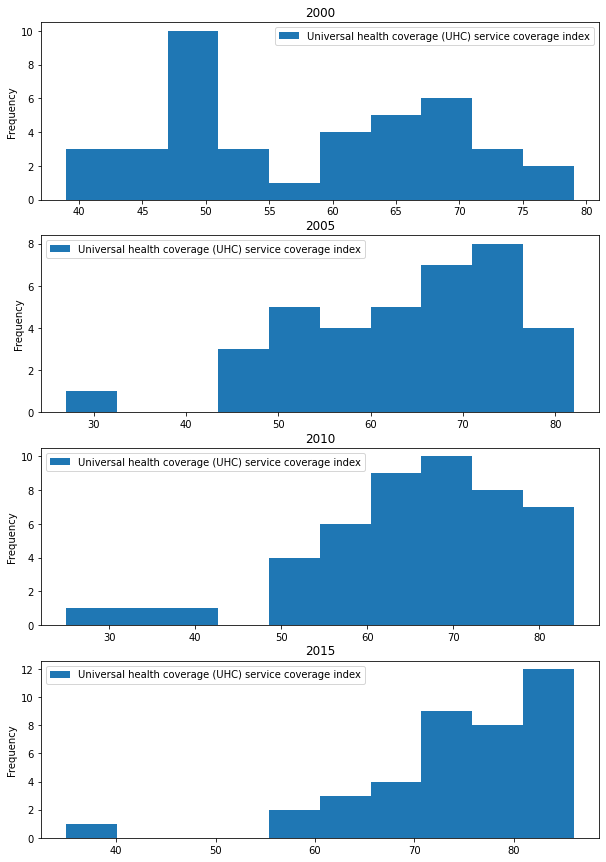

In [29]:
ax = df.plot.hist(column = ['Universal health coverage (UHC) service coverage index'], by = 'Year', figsize = (10,15))

# Relationship between UHC and Mortality rate in different Gender

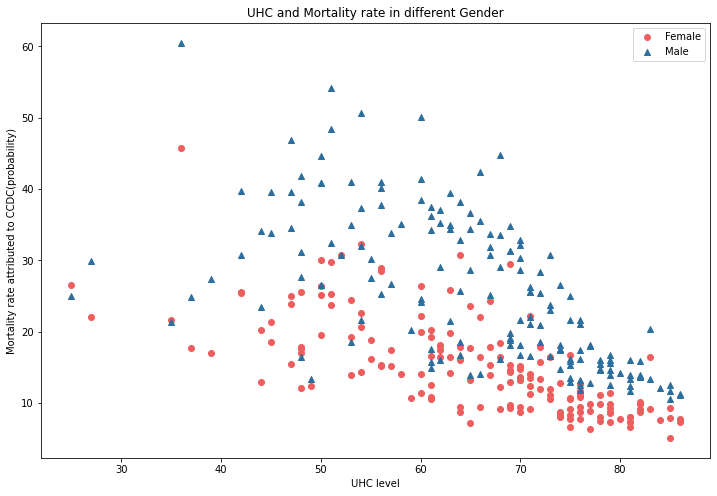

In [30]:
f_Mortality_by_CCDC = df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::FEMALE']
m_Mortality_by_CCDC = df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::MALE']
UHC = df['Universal health coverage (UHC) service coverage index']


fig = plt.figure(figsize = (12, 8))
plt.scatter(UHC,f_Mortality_by_CCDC,color='#ee5e5e',marker='o',label='Female')
plt.scatter(UHC,m_Mortality_by_CCDC,color='#2c6e9d',marker='^',label='Male')
plt.title('UHC and Mortality rate in different Gender')
plt.xlabel('UHC level')
plt.ylabel('Mortality rate attributed to CCDC(probability)')
plt.legend(loc='upper right')
plt.show()

# Grouped-aggregate summary 2 – Relationships between diabetes/cancer mortality rate and year/region/UHC.

In [31]:
# prepare new dataframe, including related columns 
diabetes_cancer_mortality_rate_df = df[['Year','Region','Country','Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX','Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease','Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease','Universal health coverage (UHC) service coverage index']].copy()

# set up a colume 'Mortality rate attributed to cancer' to store 'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX' multiple 'Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer'
diabetes_cancer_mortality_rate_df['Mortality rate attributed to cancer'] = diabetes_cancer_mortality_rate_df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'] * diabetes_cancer_mortality_rate_df['Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease']

# set up a colume 'Mortality rate attributed to diabetes' to store 'Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX' multiple 'Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease'

diabetes_cancer_mortality_rate_df['Mortality rate attributed to diabetes'] = diabetes_cancer_mortality_rate_df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'] * diabetes_cancer_mortality_rate_df['Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease']

diabetes_cancer_mortality_rate_df.drop(columns='Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX').drop(columns='Fraction of deaths due to diabetes, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease').drop(columns='Fraction of deaths due to cancer, among deaths due to cardiovascular disease, cancer, diabetes or chronic respiratory disease')

,Year,Region,Country,Universal health coverage (UHC) service coverage index,Mortality rate attributed to cancer,Mortality rate attributed to diabetes
0,2000,Europe,Albania,44,5.1425,0.2618
1,2000,Asia,Armenia,44,5.3133,1.6821
2,2005,Asia,Armenia,45,5.8082,1.6705
3,2010,Asia,Armenia,57,6.3250,1.6000
4,2000,Oceania,Australia,79,4.8246,0.3999
...,...,...,...,...,...,...
158,2005,Europe,Ukraine,51,6.6717,0.2118
159,2010,Europe,Ukraine,60,5.6430,0.1485
160,2000,Asia,Uzbekistan,56,4.1040,1.2312
161,2005,Asia,Uzbekistan,56,3.7343,1.5356


In [32]:
# median Universal health coverage (UHC) service coverage index group by region
median_UHC = diabetes_cancer_mortality_rate_df.groupby(['Region'])['Universal health coverage (UHC) service coverage index'].agg('median').reset_index(name='Median Universal health coverage (UHC) service coverage index')
median_UHC['Median Universal health coverage (UHC) service coverage index'] = median_UHC['Median Universal health coverage (UHC) service coverage index'].astype(int)

# median Mortality rate attributed to cancer group by region
median_cancer_mortality_rate = diabetes_cancer_mortality_rate_df.groupby(['Region'])['Mortality rate attributed to cancer'].agg('median').reset_index(name='Median mortality rate attributed to cancer')

# median Mortality rate attributed to diabetes group by region
median_diabetes_mortality_rate = diabetes_cancer_mortality_rate_df.groupby(['Region'])['Mortality rate attributed to diabetes'].agg('median').reset_index(name='Median mortality rate attributed to diabetes')

# Merge dataframes: median_UHC, median_cancer_mortality_rate, median_diabetes_mortality_rate
diabetes_cancer_mortality_rate = median_diabetes_mortality_rate.merge(median_cancer_mortality_rate, on = ['Region'], how = 'outer').merge(median_UHC, on = ['Region'], how = 'outer')

diabetes_cancer_mortality_rate

,Region,Median mortality rate attributed to diabetes,Median mortality rate attributed to cancer,Median Universal health coverage (UHC) service coverage index
0,Africa,2.22310,4.62510,51
1,Americas,1.50545,4.44720,63
2,Asia,1.21060,4.71895,61
3,Europe,0.39600,5.46210,70
4,Oceania,0.41760,4.76050,80


# chart 2 : Relationship between Median UHC and Median Mortality rate attributed to diabetes in different regions

In [33]:
# median Universal health coverage (UHC) service coverage index group by region and country
median_UHC = diabetes_cancer_mortality_rate_df.groupby(['Region','Country'])['Universal health coverage (UHC) service coverage index'].agg('median').reset_index(name='Median Universal health coverage (UHC) service coverage index')
median_UHC['Median Universal health coverage (UHC) service coverage index'] = median_UHC['Median Universal health coverage (UHC) service coverage index'].astype(int)

# median Mortality rate attributed to cancer group by region and Country
median_cancer_mortality_rate = diabetes_cancer_mortality_rate_df.groupby(['Region','Country'])['Mortality rate attributed to cancer'].agg('median').reset_index(name='Median mortality rate attributed to cancer')

# median Mortality rate attributed to diabetes group by region and Country
median_diabetes_mortality_rate = diabetes_cancer_mortality_rate_df.groupby(['Region','Country'])['Mortality rate attributed to diabetes'].agg('median').reset_index(name='Median mortality rate attributed to diabetes')

# Merge dataframes: median_UHC, median_cancer_mortality_rate, median_diabetes_mortality_rate
diabetes_cancer_mortality_rate = median_diabetes_mortality_rate.merge(median_cancer_mortality_rate, on = ['Region','Country'], how = 'outer').merge(median_UHC, on = ['Region','Country'], how = 'outer')

diabetes_cancer_mortality_rate

,Region,Country,Median mortality rate attributed to diabetes,Median mortality rate attributed to cancer,Median Universal health coverage (UHC) service coverage index
0,Africa,Cabo Verde,1.27280,4.52880,61
1,Africa,Cote d'Ivoire,2.98320,5.01600,27
2,Africa,Mauritius,7.70240,3.80535,58
3,Africa,Niger,2.02100,4.12800,35
4,Africa,Seychelles,1.87270,7.26255,52
...,...,...,...,...,...
66,Europe,Ukraine,0.20820,6.67170,51
67,Oceania,Australia,0.40455,4.32480,83
68,Oceania,Kiribati,11.44800,8.85100,36
69,Oceania,New Zealand,0.47840,4.84195,80


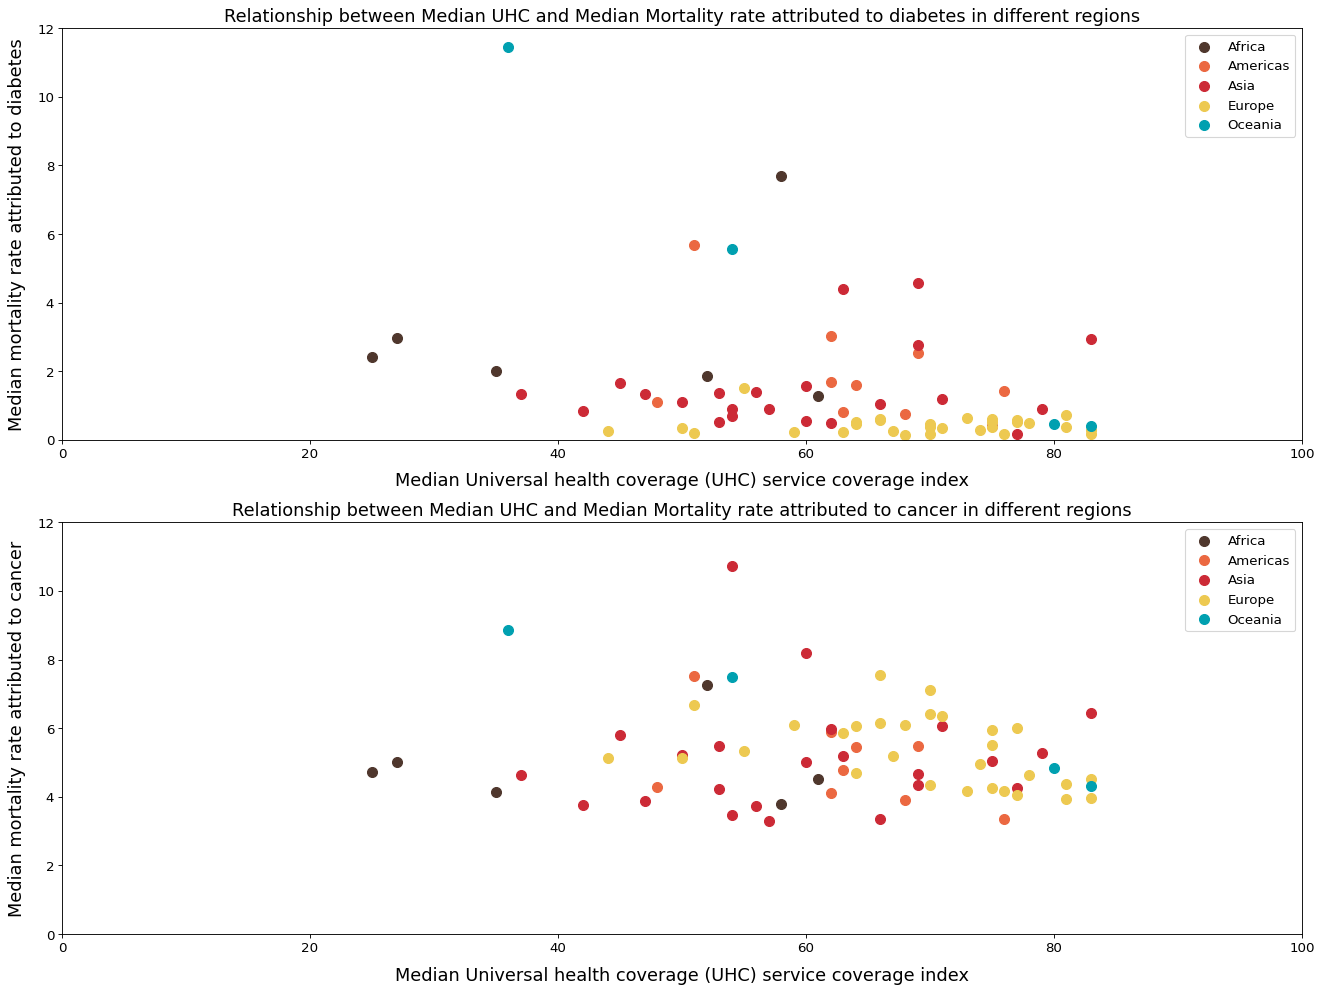

In [34]:
plt.subplots(nrows=2, ncols=1, figsize=(20,15), dpi=80)

# Prepare Data for diabetes scatter
# Create as many colors as there are mortality_rate_country['category']
categories = np.unique(diabetes_cancer_mortality_rate['Region'])
list_x = diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'].tolist()
list_y = diabetes_cancer_mortality_rate['Median mortality rate attributed to diabetes'].tolist()
colors = ['#4f372d','#eb6841','#cc2a36','#edc951','#00a0b0']

# Draw Plot for Each Category
plt.subplot(2, 1, 1)
for i, category in enumerate(categories):
    plt.scatter('Median Universal health coverage (UHC) service coverage index', 'Median mortality rate attributed to diabetes', 
                data=diabetes_cancer_mortality_rate.loc[diabetes_cancer_mortality_rate.Region==category, :], 
                s=80, c=colors[i], label=str(category))
# Decorations
plt.gca().set(xlim=(0, 100), ylim=(0, 12))
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Relationship between Median UHC and Median Mortality rate attributed to diabetes in different regions", fontsize=16)
plt.xlabel('Median Universal health coverage (UHC) service coverage index', fontsize=16, labelpad=10)
plt.ylabel('Median mortality rate attributed to diabetes', fontsize=16, labelpad=10)
plt.legend(fontsize=12)   

# Prepare Data for cancer-scatter
# Create as many colors as there are mortality_rate_country['category']
categories = np.unique(diabetes_cancer_mortality_rate['Region'])
list_x = diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'].tolist()
list_y = diabetes_cancer_mortality_rate['Median mortality rate attributed to cancer'].tolist()
colors = ['#4f372d','#eb6841','#cc2a36','#edc951','#00a0b0']

# Draw Plot for Each Category
plt.subplot(2, 1, 2)
for i, category in enumerate(categories):
    plt.scatter('Median Universal health coverage (UHC) service coverage index', 'Median mortality rate attributed to cancer', 
                data=diabetes_cancer_mortality_rate.loc[diabetes_cancer_mortality_rate.Region==category, :], 
                s=80, c=colors[i], label=str(category))
# Decorations
plt.gca().set(xlim=(0, 100), ylim=(0, 12))
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Relationship between Median UHC and Median Mortality rate attributed to cancer in different regions", fontsize=16)
plt.xlabel('Median Universal health coverage (UHC) service coverage index', fontsize=16, labelpad=10)
plt.ylabel('Median mortality rate attributed to cancer', fontsize=16, labelpad=10)
plt.legend(fontsize=12)    
plt.show() 

# Boxplot for UHC and Median mortality rate attibuted to Diabetes and Cancer

In [35]:
#find the max value of Median UHC in diabetes_cancer_mortality_rate
diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'].max()

83

In [36]:
#find the min value of Median UHC in diabetes_cancer_mortality_rate
diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'].min()

25

In [37]:
# Prepare data for drawing boxplot
plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

for index, row in diabetes_cancer_mortality_rate.iterrows():
    if diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] <= 40:
        diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] = '21-40'
    elif diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] <= 60:
        diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] = '41-60'
    elif diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] <= 80:
        diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] = '61-80'
    elif diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] <= 100:
        diabetes_cancer_mortality_rate.loc[index, 'Median Universal health coverage (UHC) service coverage index'] = '81-100'
    

<Figure size 1200x800 with 0 Axes>

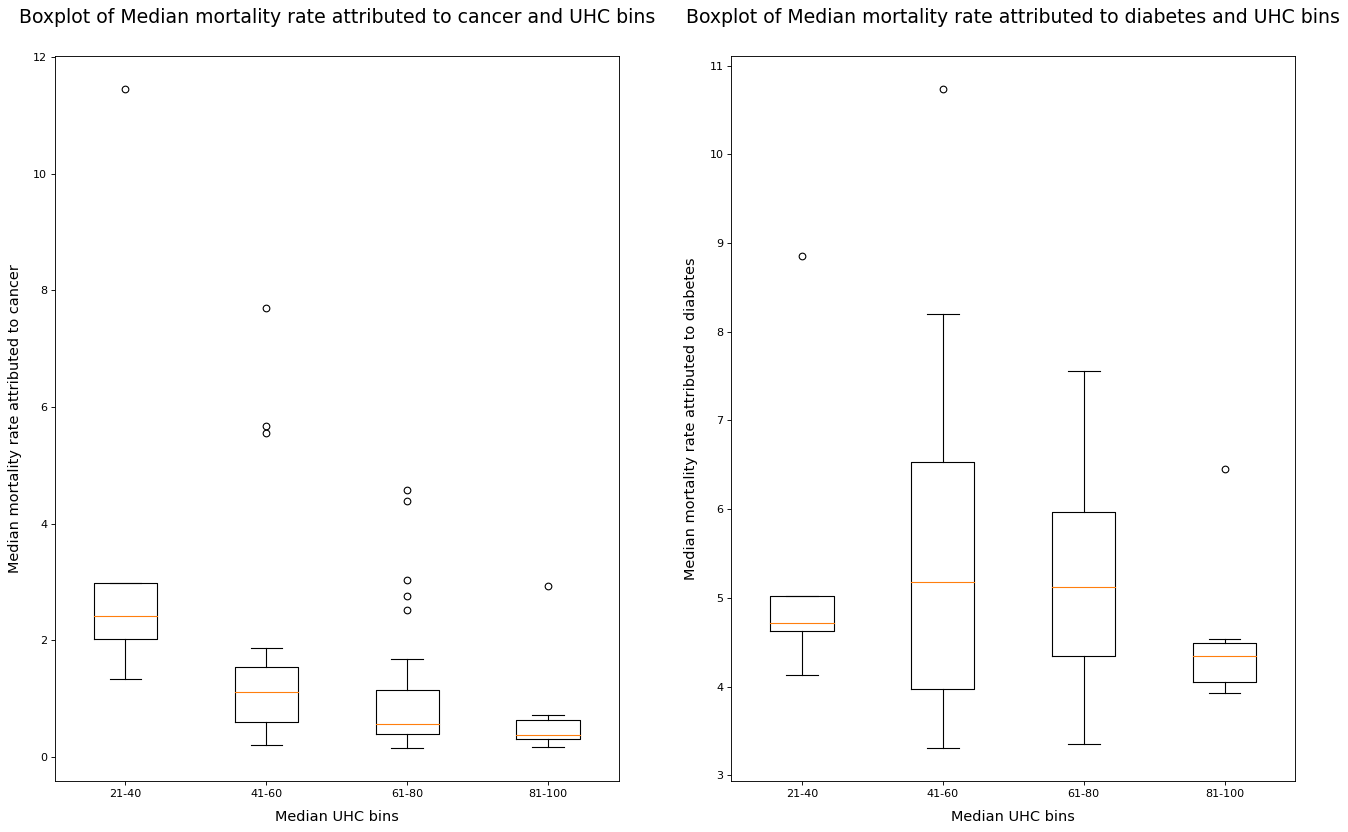

In [38]:
plt.subplots(nrows=1, ncols=2, figsize=(20,12), dpi=80)

# Drawing boxplot for UHC and Median mortality rate attributed to Diabetes
box_1 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '21-40']['Median mortality rate attributed to diabetes'].tolist()
box_2 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '41-60']['Median mortality rate attributed to diabetes'].tolist()
box_3 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '61-80']['Median mortality rate attributed to diabetes'].tolist()
box_4 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '81-100']['Median mortality rate attributed to diabetes'].tolist()
plt.title('Boxplot of Median mortality rate attributed to diabetes and UHC bins', fontsize=17, pad=30)
labels = '21-40','41-60','61-80','81-100'
plt.xlabel('Median UHC bins', fontsize=13, labelpad=10)
plt.ylabel('Median mortality rate attributed to diabetes', fontsize=13, labelpad=10)
plt.subplot(1, 2, 1)
plt.boxplot([box_1,box_2,box_3,box_4], labels = labels)


# Drawing boxplot for UHC and Median mortality rate attributed to Cancer
box_5 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '21-40']['Median mortality rate attributed to cancer'].tolist()
box_6 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '41-60']['Median mortality rate attributed to cancer'].tolist()
box_7 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '61-80']['Median mortality rate attributed to cancer'].tolist()
box_8 = diabetes_cancer_mortality_rate[diabetes_cancer_mortality_rate['Median Universal health coverage (UHC) service coverage index'] == '81-100']['Median mortality rate attributed to cancer'].tolist()
plt.title('Boxplot of Median mortality rate attributed to cancer and UHC bins', fontsize=17, pad=30)
labels = '21-40','41-60','61-80','81-100'
plt.xlabel('Median UHC bins', fontsize=13, labelpad=10)
plt.ylabel('Median mortality rate attributed to cancer', fontsize=13, labelpad=10)
plt.subplot(1, 2, 2)
plt.boxplot([box_5,box_6,box_7,box_8], labels = labels)
plt.show()